## Import the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data set

In [2]:
df = pd.read_csv('Absenteeism_preprocessed3.csv')

In [3]:
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_for_Absence,month,Day of year,Day of week
0,289,36,33,239.554,30,0,2,1,4,0.044286,7,188,1
1,118,13,50,239.554,31,0,1,0,0,0.054286,7,195,1
2,179,51,38,239.554,31,0,0,0,2,0.210000,7,196,2
3,279,5,39,239.554,24,0,2,0,4,0.018571,7,197,3
4,289,36,33,239.554,30,0,2,1,2,0.210000,7,204,3


In [4]:
df['Education'].nunique()

2

## Targets

In [5]:
df['Absenteeism Time in Hours'].median()

3.0

**If Values is >3 then targe is 1 or else 0**

In [6]:
targets= np.where(df['Absenteeism Time in Hours']>3,0,1)

In [7]:
df['Excessive Absentees']=targets

In [8]:
df=df.drop('Absenteeism Time in Hours',axis=1)

In [9]:
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Reason_for_Absence,month,Day of year,Day of week,Excessive Absentees
0,289,36,33,239.554,30,0,2,1,0.044286,7,188,1,0
1,118,13,50,239.554,31,0,1,0,0.054286,7,195,1,1
2,179,51,38,239.554,31,0,0,0,0.210000,7,196,2,1
3,279,5,39,239.554,24,0,2,0,0.018571,7,197,3,0
4,289,36,33,239.554,30,0,2,1,0.210000,7,204,3,1


In [10]:
df['Excessive Absentees'].value_counts()

1    381
0    319
Name: Excessive Absentees, dtype: int64

## Splitting the data

In [11]:
X= df.drop('Excessive Absentees',axis=1)
y= df['Excessive Absentees']

In [12]:
X.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Reason_for_Absence,month,Day of year,Day of week
0,289,36,33,239.554,30,0,2,1,0.044286,7,188,1
1,118,13,50,239.554,31,0,1,0,0.054286,7,195,1
2,179,51,38,239.554,31,0,0,0,0.210000,7,196,2
3,279,5,39,239.554,24,0,2,0,0.018571,7,197,3
4,289,36,33,239.554,30,0,2,1,0.210000,7,204,3


In [13]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Excessive Absentees, dtype: int32

In [14]:
from scipy import stats
df[(np.abs(stats.zscore(df))<3).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Transportation Expense   700 non-null    int64  
 1   Distance to Work         700 non-null    int64  
 2   Age                      700 non-null    int64  
 3   Daily Work Load Average  700 non-null    float64
 4   Body Mass Index          700 non-null    int64  
 5   Education                700 non-null    int64  
 6   Children                 700 non-null    int64  
 7   Pets                     700 non-null    int64  
 8   Reason_for_Absence       700 non-null    float64
 9   month                    700 non-null    int64  
 10  Day of year              700 non-null    int64  
 11  Day of week              700 non-null    int64  
 12  Excessive Absentees      700 non-null    int32  
dtypes: float64(2), int32(1), int64(10)
memory usage: 68.5 KB


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing Data

In [17]:
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()

In [18]:
X_train= Sc.fit_transform(X_train)
X_test= Sc.transform(X_test)

## ML Model

### RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier 
M1= RandomForestClassifier()

In [20]:
M1.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
M1.feature_importances_

array([0.08612776, 0.04755582, 0.05105357, 0.1270248 , 0.04385871,
       0.01085208, 0.0292704 , 0.01559251, 0.29877885, 0.07470049,
       0.14020655, 0.07497845])

In [25]:
P1=M1.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,accuracy_score
print(classification_report(y_test,P1))
print('\n')
print(confusion_matrix(y_test, P1))
print('\n')
print(accuracy_score(y_test, P1))
print('\n')
accuracy = accuracy_score(y_test, P1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P1))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        58
           1       0.82      0.84      0.83        82

    accuracy                           0.80       140
   macro avg       0.79      0.79      0.79       140
weighted avg       0.80      0.80      0.80       140



[[43 15]
 [13 69]]


0.8


Accuracy: 80.00%
ROC AUC Score 0.791421362489487


### Predictions and Evaluations From Top feature

In [27]:
from sklearn.feature_selection import RFE

In [28]:
M2 = RFE(M1,n_features_to_select=4)

In [29]:
M2.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=4)

In [30]:
P2=M2.predict(X_test)

In [31]:
print(classification_report(y_test,P2))
print('\n')
print(confusion_matrix(y_test, P2))
print('\n')
print(accuracy_score(y_test, P2))
print('\n')
accuracy = accuracy_score(y_test, P2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P2))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        58
           1       0.85      0.83      0.84        82

    accuracy                           0.81       140
   macro avg       0.81      0.81      0.81       140
weighted avg       0.82      0.81      0.81       140



[[46 12]
 [14 68]]


0.8142857142857143


Accuracy: 81.43%
ROC AUC Score 0.8111858704793944


## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
M3=DecisionTreeClassifier()

In [33]:
M3.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
P3= M3.predict(X_test)

In [35]:
print(classification_report(y_test,P3))
print('\n')
print(confusion_matrix(y_test, P3))
print('\n')
print(accuracy_score(y_test, P3))
print('\n')
accuracy = accuracy_score(y_test, P3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P3))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        58
           1       0.78      0.80      0.79        82

    accuracy                           0.75       140
   macro avg       0.74      0.74      0.74       140
weighted avg       0.75      0.75      0.75       140



[[39 19]
 [16 66]]


0.75


Accuracy: 75.00%
ROC AUC Score 0.738645920941968


## Support Vector Machine

In [36]:
from sklearn.svm import SVC

In [37]:
M4= SVC()

In [38]:
M4.fit(X_train,y_train)

SVC()

In [39]:
P4= M4.predict(X_test)

In [40]:
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
print(accuracy_score(y_test, P4))
print('\n')
accuracy = accuracy_score(y_test, P4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P4))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        58
           1       0.81      0.78      0.80        82

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.77      0.76      0.77       140



[[43 15]
 [18 64]]


0.7642857142857142


Accuracy: 76.43%
ROC AUC Score 0.7609335576114382


### Gridsearch

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'C': [0.1,1, 10, 100, 1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [43]:
gr=GridSearchCV(SVC(),param_grid)

In [44]:
gr.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [45]:
gr.best_estimator_

SVC(C=1, gamma=0.1)

In [46]:
P4=gr.predict(X_test)

In [47]:
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
print(accuracy_score(y_test, P4))
print('\n')
accuracy = accuracy_score(y_test, P4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P4))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        58
           1       0.82      0.80      0.81        82

    accuracy                           0.79       140
   macro avg       0.78      0.78      0.78       140
weighted avg       0.79      0.79      0.79       140



[[44 14]
 [16 66]]


0.7857142857142857


Accuracy: 78.57%
ROC AUC Score 0.7817493692178301


## Naive Bayes classifier

In [48]:
from sklearn.naive_bayes import GaussianNB
M5=GaussianNB()

In [49]:
M5.fit(X_train,y_train)

GaussianNB()

In [50]:
P5=M5.predict(X_test)

In [51]:
print(classification_report(y_test,P5))
print('\n')
print(confusion_matrix(y_test, P5))
print('\n')
print(accuracy_score(y_test, P5))
print('\n')
accuracy = accuracy_score(y_test, P5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P5))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        58
           1       0.74      0.78      0.76        82

    accuracy                           0.71       140
   macro avg       0.71      0.70      0.70       140
weighted avg       0.71      0.71      0.71       140



[[36 22]
 [18 64]]


0.7142857142857143


Accuracy: 71.43%
ROC AUC Score 0.7005887300252313


## KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))

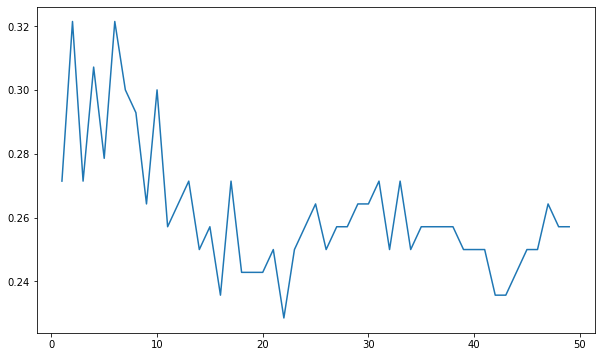

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range (1,50),error_Mat)

In [104]:
M6= KNeighborsClassifier(n_neighbors=22)

In [105]:
M6.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [106]:
P6=M6.predict(X_test)

In [107]:
print(classification_report(y_test,P6))
print('\n')
print(confusion_matrix(y_test, P6))
print('\n')
print(accuracy_score(y_test, P6))
print('\n')
accuracy = accuracy_score(y_test, P6)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P6))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        58
           1       0.80      0.80      0.80        82

    accuracy                           0.77       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.77      0.77      0.77       140



[[42 16]
 [16 66]]


0.7714285714285715


Accuracy: 77.14%
ROC AUC Score 0.7645079899074853


## LogisticRegression

In [59]:
from sklearn.linear_model import LogisticRegression
M7= LogisticRegression()

In [60]:
M7.fit(X_train,y_train)

LogisticRegression()

In [61]:
P7 = M7.predict(X_test)

In [62]:
print(classification_report(y_test,P7))
print('\n')
print(confusion_matrix(y_test, P7))
print('\n')
print(accuracy_score(y_test, P7))
print('\n')
accuracy = accuracy_score(y_test, P7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P7))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        58
           1       0.82      0.74      0.78        82

    accuracy                           0.76       140
   macro avg       0.75      0.76      0.75       140
weighted avg       0.77      0.76      0.76       140



[[45 13]
 [21 61]]


0.7571428571428571


Accuracy: 75.71%
ROC AUC Score 0.7598822539949537


## GB Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
M8=GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=2)

In [65]:
M8.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2)

In [66]:
P8=M8.predict(X_test)

In [67]:
print(classification_report(y_test,P8))
print('\n')
print(confusion_matrix(y_test, P8))
print('\n')
print(accuracy_score(y_test, P8))
print('\n')
accuracy = accuracy_score(y_test, P8)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P8))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        58
           1       0.84      0.84      0.84        82

    accuracy                           0.81       140
   macro avg       0.81      0.81      0.81       140
weighted avg       0.81      0.81      0.81       140



[[45 13]
 [13 69]]


0.8142857142857143


Accuracy: 81.43%
ROC AUC Score 0.8086627417998317


## Histogram Boosting Classifier

In [68]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [69]:
M9= HistGradientBoostingClassifier()

In [70]:
M9.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [71]:
P9=M9.predict(X_test)

In [72]:
print(classification_report(y_test,P9))
print('\n')
print(confusion_matrix(y_test, P9))
print('\n')
print(accuracy_score(y_test, P9))
print('\n')
accuracy = accuracy_score(y_test, P9)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P9))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        58
           1       0.85      0.89      0.87        82

    accuracy                           0.84       140
   macro avg       0.84      0.83      0.84       140
weighted avg       0.84      0.84      0.84       140



[[45 13]
 [ 9 73]]


0.8428571428571429


Accuracy: 84.29%
ROC AUC Score 0.8330529857022708


## XGB Boosting

In [73]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [74]:
M10=XGBClassifier()

In [75]:
from sklearn.model_selection import KFold , cross_val_score

In [76]:
kfold= KFold(n_splits=6, shuffle=False, random_state=None)
scores= cross_val_score(M10, X_train, y_train, cv=kfold,verbose=False)

[12:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [77]:
scores

array([0.71276596, 0.80851064, 0.75268817, 0.74193548, 0.76344086,
       0.77419355])

In [78]:
M10.fit(X_train,y_train)

[12:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
P10= M10.predict(X_test)

In [80]:
print(classification_report(y_test,P10))
print('\n')
print(confusion_matrix(y_test, P10))
print('\n')
print(accuracy_score(y_test, P10))
print('\n')
accuracy = accuracy_score(y_test, P10)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P10))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        58
           1       0.86      0.84      0.85        82

    accuracy                           0.83       140
   macro avg       0.82      0.83      0.82       140
weighted avg       0.83      0.83      0.83       140



[[47 11]
 [13 69]]


0.8285714285714286


Accuracy: 82.86%
ROC AUC Score 0.8259041211101765


## Light GBM

In [81]:
from lightgbm import LGBMClassifier

In [82]:
M11=LGBMClassifier()

In [83]:
Kfold=KFold(n_splits=5, shuffle=False, random_state=None)
score=cross_val_score(M11,X_train,y_train,cv=Kfold)
score

array([0.71428571, 0.80357143, 0.75892857, 0.77678571, 0.76785714])

In [84]:
M11.fit(X_train,y_train)

LGBMClassifier()

In [85]:
P11=M11.predict(X_test)

In [86]:
print(classification_report(y_test,P11))
print('\n')
print(confusion_matrix(y_test, P11))
print('\n')
print(accuracy_score(y_test, P11))
print('\n')
accuracy = accuracy_score(y_test, P11)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P11))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        58
           1       0.86      0.87      0.86        82

    accuracy                           0.84       140
   macro avg       0.83      0.83      0.83       140
weighted avg       0.84      0.84      0.84       140



[[46 12]
 [11 71]]


0.8357142857142857


Accuracy: 83.57%
ROC AUC Score 0.8294785534062237


## CAT Boosting

In [87]:
from catboost import CatBoostClassifier

In [88]:
M12= CatBoostClassifier()

In [89]:
score=cross_val_score(M12,X_train,y_train,cv=kfold,verbose=False)

Learning rate set to 0.007436
0:	learn: 0.6890580	total: 134ms	remaining: 2m 13s
1:	learn: 0.6851099	total: 137ms	remaining: 1m 8s
2:	learn: 0.6823629	total: 140ms	remaining: 46.4s
3:	learn: 0.6791786	total: 142ms	remaining: 35.5s
4:	learn: 0.6754317	total: 145ms	remaining: 28.9s
5:	learn: 0.6725761	total: 148ms	remaining: 24.5s
6:	learn: 0.6697385	total: 151ms	remaining: 21.4s
7:	learn: 0.6666227	total: 153ms	remaining: 19s
8:	learn: 0.6634177	total: 156ms	remaining: 17.2s
9:	learn: 0.6598653	total: 159ms	remaining: 15.8s
10:	learn: 0.6565915	total: 162ms	remaining: 14.6s
11:	learn: 0.6534208	total: 165ms	remaining: 13.6s
12:	learn: 0.6507130	total: 168ms	remaining: 12.7s
13:	learn: 0.6478991	total: 171ms	remaining: 12s
14:	learn: 0.6449222	total: 173ms	remaining: 11.4s
15:	learn: 0.6425365	total: 176ms	remaining: 10.8s
16:	learn: 0.6399473	total: 178ms	remaining: 10.3s
17:	learn: 0.6372651	total: 183ms	remaining: 9.97s
18:	learn: 0.6339365	total: 186ms	remaining: 9.6s
19:	learn: 0.63

204:	learn: 0.4129815	total: 688ms	remaining: 2.67s
205:	learn: 0.4123341	total: 691ms	remaining: 2.66s
206:	learn: 0.4119960	total: 694ms	remaining: 2.66s
207:	learn: 0.4113914	total: 696ms	remaining: 2.65s
208:	learn: 0.4111050	total: 699ms	remaining: 2.65s
209:	learn: 0.4106959	total: 702ms	remaining: 2.64s
210:	learn: 0.4098930	total: 704ms	remaining: 2.63s
211:	learn: 0.4096359	total: 707ms	remaining: 2.63s
212:	learn: 0.4094187	total: 709ms	remaining: 2.62s
213:	learn: 0.4089248	total: 712ms	remaining: 2.61s
214:	learn: 0.4084427	total: 714ms	remaining: 2.61s
215:	learn: 0.4076470	total: 717ms	remaining: 2.6s
216:	learn: 0.4065859	total: 722ms	remaining: 2.6s
217:	learn: 0.4058272	total: 725ms	remaining: 2.6s
218:	learn: 0.4052290	total: 727ms	remaining: 2.59s
219:	learn: 0.4048429	total: 730ms	remaining: 2.59s
220:	learn: 0.4045326	total: 733ms	remaining: 2.58s
221:	learn: 0.4040109	total: 735ms	remaining: 2.58s
222:	learn: 0.4032178	total: 738ms	remaining: 2.57s
223:	learn: 0.4

380:	learn: 0.3436075	total: 1.19s	remaining: 1.94s
381:	learn: 0.3435047	total: 1.19s	remaining: 1.93s
382:	learn: 0.3432601	total: 1.2s	remaining: 1.93s
383:	learn: 0.3430551	total: 1.2s	remaining: 1.93s
384:	learn: 0.3427949	total: 1.2s	remaining: 1.92s
385:	learn: 0.3425673	total: 1.21s	remaining: 1.92s
386:	learn: 0.3423056	total: 1.21s	remaining: 1.91s
387:	learn: 0.3420993	total: 1.21s	remaining: 1.91s
388:	learn: 0.3419587	total: 1.21s	remaining: 1.91s
389:	learn: 0.3415348	total: 1.22s	remaining: 1.9s
390:	learn: 0.3412662	total: 1.22s	remaining: 1.9s
391:	learn: 0.3407966	total: 1.22s	remaining: 1.9s
392:	learn: 0.3406304	total: 1.22s	remaining: 1.89s
393:	learn: 0.3402271	total: 1.23s	remaining: 1.89s
394:	learn: 0.3400106	total: 1.23s	remaining: 1.89s
395:	learn: 0.3397261	total: 1.23s	remaining: 1.88s
396:	learn: 0.3392697	total: 1.24s	remaining: 1.88s
397:	learn: 0.3391420	total: 1.24s	remaining: 1.87s
398:	learn: 0.3387616	total: 1.24s	remaining: 1.87s
399:	learn: 0.3384

546:	learn: 0.3026775	total: 1.67s	remaining: 1.38s
547:	learn: 0.3021731	total: 1.67s	remaining: 1.38s
548:	learn: 0.3020076	total: 1.67s	remaining: 1.37s
549:	learn: 0.3018911	total: 1.68s	remaining: 1.37s
550:	learn: 0.3014696	total: 1.68s	remaining: 1.37s
551:	learn: 0.3012921	total: 1.68s	remaining: 1.36s
552:	learn: 0.3008861	total: 1.68s	remaining: 1.36s
553:	learn: 0.3005588	total: 1.69s	remaining: 1.36s
554:	learn: 0.3003780	total: 1.69s	remaining: 1.35s
555:	learn: 0.3002242	total: 1.69s	remaining: 1.35s
556:	learn: 0.3000587	total: 1.7s	remaining: 1.35s
557:	learn: 0.2998605	total: 1.7s	remaining: 1.34s
558:	learn: 0.2997893	total: 1.7s	remaining: 1.34s
559:	learn: 0.2995596	total: 1.7s	remaining: 1.34s
560:	learn: 0.2994361	total: 1.71s	remaining: 1.34s
561:	learn: 0.2991017	total: 1.71s	remaining: 1.33s
562:	learn: 0.2989218	total: 1.71s	remaining: 1.33s
563:	learn: 0.2988039	total: 1.72s	remaining: 1.33s
564:	learn: 0.2986300	total: 1.72s	remaining: 1.32s
565:	learn: 0.29

734:	learn: 0.2625653	total: 2.18s	remaining: 785ms
735:	learn: 0.2624307	total: 2.18s	remaining: 783ms
736:	learn: 0.2621701	total: 2.18s	remaining: 780ms
737:	learn: 0.2620836	total: 2.19s	remaining: 777ms
738:	learn: 0.2619751	total: 2.19s	remaining: 774ms
739:	learn: 0.2616709	total: 2.19s	remaining: 771ms
740:	learn: 0.2613060	total: 2.2s	remaining: 768ms
741:	learn: 0.2611860	total: 2.2s	remaining: 765ms
742:	learn: 0.2610246	total: 2.2s	remaining: 762ms
743:	learn: 0.2609209	total: 2.2s	remaining: 759ms
744:	learn: 0.2608544	total: 2.21s	remaining: 756ms
745:	learn: 0.2605880	total: 2.21s	remaining: 752ms
746:	learn: 0.2604446	total: 2.21s	remaining: 749ms
747:	learn: 0.2602357	total: 2.21s	remaining: 746ms
748:	learn: 0.2601235	total: 2.22s	remaining: 743ms
749:	learn: 0.2598150	total: 2.22s	remaining: 740ms
750:	learn: 0.2596945	total: 2.22s	remaining: 737ms
751:	learn: 0.2595158	total: 2.23s	remaining: 735ms
752:	learn: 0.2593649	total: 2.23s	remaining: 732ms
753:	learn: 0.25

914:	learn: 0.2289507	total: 2.69s	remaining: 250ms
915:	learn: 0.2287812	total: 2.69s	remaining: 247ms
916:	learn: 0.2285741	total: 2.69s	remaining: 244ms
917:	learn: 0.2284439	total: 2.69s	remaining: 241ms
918:	learn: 0.2282048	total: 2.7s	remaining: 238ms
919:	learn: 0.2279455	total: 2.7s	remaining: 235ms
920:	learn: 0.2277413	total: 2.7s	remaining: 232ms
921:	learn: 0.2276552	total: 2.71s	remaining: 229ms
922:	learn: 0.2275330	total: 2.71s	remaining: 226ms
923:	learn: 0.2274077	total: 2.71s	remaining: 223ms
924:	learn: 0.2272708	total: 2.71s	remaining: 220ms
925:	learn: 0.2271559	total: 2.72s	remaining: 217ms
926:	learn: 0.2268359	total: 2.72s	remaining: 214ms
927:	learn: 0.2265644	total: 2.72s	remaining: 211ms
928:	learn: 0.2265147	total: 2.73s	remaining: 208ms
929:	learn: 0.2262923	total: 2.73s	remaining: 205ms
930:	learn: 0.2261362	total: 2.73s	remaining: 202ms
931:	learn: 0.2259775	total: 2.73s	remaining: 199ms
932:	learn: 0.2258153	total: 2.73s	remaining: 196ms
933:	learn: 0.2

118:	learn: 0.4894294	total: 327ms	remaining: 2.42s
119:	learn: 0.4885632	total: 331ms	remaining: 2.43s
120:	learn: 0.4875729	total: 334ms	remaining: 2.42s
121:	learn: 0.4867853	total: 337ms	remaining: 2.43s
122:	learn: 0.4862027	total: 340ms	remaining: 2.43s
123:	learn: 0.4853103	total: 343ms	remaining: 2.42s
124:	learn: 0.4842059	total: 346ms	remaining: 2.42s
125:	learn: 0.4831158	total: 348ms	remaining: 2.42s
126:	learn: 0.4823869	total: 351ms	remaining: 2.41s
127:	learn: 0.4815973	total: 355ms	remaining: 2.42s
128:	learn: 0.4810238	total: 357ms	remaining: 2.41s
129:	learn: 0.4803989	total: 360ms	remaining: 2.41s
130:	learn: 0.4795763	total: 363ms	remaining: 2.41s
131:	learn: 0.4790065	total: 366ms	remaining: 2.4s
132:	learn: 0.4779041	total: 368ms	remaining: 2.4s
133:	learn: 0.4769861	total: 372ms	remaining: 2.4s
134:	learn: 0.4761469	total: 376ms	remaining: 2.41s
135:	learn: 0.4752232	total: 378ms	remaining: 2.4s
136:	learn: 0.4745488	total: 384ms	remaining: 2.42s
137:	learn: 0.47

291:	learn: 0.3912284	total: 829ms	remaining: 2.01s
292:	learn: 0.3904600	total: 831ms	remaining: 2.01s
293:	learn: 0.3902504	total: 834ms	remaining: 2s
294:	learn: 0.3899587	total: 837ms	remaining: 2s
295:	learn: 0.3895303	total: 839ms	remaining: 2s
296:	learn: 0.3891819	total: 842ms	remaining: 1.99s
297:	learn: 0.3885498	total: 845ms	remaining: 1.99s
298:	learn: 0.3879263	total: 848ms	remaining: 1.99s
299:	learn: 0.3874741	total: 850ms	remaining: 1.98s
300:	learn: 0.3871751	total: 853ms	remaining: 1.98s
301:	learn: 0.3865592	total: 856ms	remaining: 1.98s
302:	learn: 0.3861048	total: 859ms	remaining: 1.98s
303:	learn: 0.3856589	total: 862ms	remaining: 1.97s
304:	learn: 0.3853819	total: 864ms	remaining: 1.97s
305:	learn: 0.3849152	total: 867ms	remaining: 1.97s
306:	learn: 0.3844578	total: 870ms	remaining: 1.96s
307:	learn: 0.3837766	total: 873ms	remaining: 1.96s
308:	learn: 0.3837378	total: 875ms	remaining: 1.96s
309:	learn: 0.3833096	total: 878ms	remaining: 1.95s
310:	learn: 0.3828262

465:	learn: 0.3348697	total: 1.33s	remaining: 1.53s
466:	learn: 0.3342216	total: 1.34s	remaining: 1.53s
467:	learn: 0.3338699	total: 1.34s	remaining: 1.52s
468:	learn: 0.3337195	total: 1.34s	remaining: 1.52s
469:	learn: 0.3333955	total: 1.34s	remaining: 1.52s
470:	learn: 0.3331235	total: 1.35s	remaining: 1.51s
471:	learn: 0.3329223	total: 1.35s	remaining: 1.51s
472:	learn: 0.3326522	total: 1.35s	remaining: 1.51s
473:	learn: 0.3323452	total: 1.36s	remaining: 1.51s
474:	learn: 0.3320928	total: 1.36s	remaining: 1.5s
475:	learn: 0.3318014	total: 1.36s	remaining: 1.5s
476:	learn: 0.3316043	total: 1.37s	remaining: 1.5s
477:	learn: 0.3312690	total: 1.37s	remaining: 1.5s
478:	learn: 0.3309752	total: 1.37s	remaining: 1.5s
479:	learn: 0.3307278	total: 1.38s	remaining: 1.49s
480:	learn: 0.3305480	total: 1.38s	remaining: 1.49s
481:	learn: 0.3302070	total: 1.38s	remaining: 1.49s
482:	learn: 0.3300113	total: 1.39s	remaining: 1.49s
483:	learn: 0.3296849	total: 1.39s	remaining: 1.48s
484:	learn: 0.329

640:	learn: 0.2924733	total: 1.84s	remaining: 1.03s
641:	learn: 0.2922989	total: 1.84s	remaining: 1.02s
642:	learn: 0.2920150	total: 1.84s	remaining: 1.02s
643:	learn: 0.2918551	total: 1.84s	remaining: 1.02s
644:	learn: 0.2916183	total: 1.85s	remaining: 1.02s
645:	learn: 0.2913934	total: 1.85s	remaining: 1.01s
646:	learn: 0.2911485	total: 1.85s	remaining: 1.01s
647:	learn: 0.2911285	total: 1.85s	remaining: 1.01s
648:	learn: 0.2907796	total: 1.86s	remaining: 1s
649:	learn: 0.2904460	total: 1.86s	remaining: 1s
650:	learn: 0.2903557	total: 1.86s	remaining: 999ms
651:	learn: 0.2901512	total: 1.87s	remaining: 996ms
652:	learn: 0.2900605	total: 1.87s	remaining: 993ms
653:	learn: 0.2898378	total: 1.87s	remaining: 990ms
654:	learn: 0.2896020	total: 1.87s	remaining: 987ms
655:	learn: 0.2894414	total: 1.88s	remaining: 984ms
656:	learn: 0.2891526	total: 1.88s	remaining: 981ms
657:	learn: 0.2888138	total: 1.88s	remaining: 978ms
658:	learn: 0.2883047	total: 1.88s	remaining: 975ms
659:	learn: 0.2881

826:	learn: 0.2535837	total: 2.34s	remaining: 490ms
827:	learn: 0.2534053	total: 2.35s	remaining: 487ms
828:	learn: 0.2531497	total: 2.35s	remaining: 484ms
829:	learn: 0.2529174	total: 2.35s	remaining: 481ms
830:	learn: 0.2527925	total: 2.35s	remaining: 479ms
831:	learn: 0.2524515	total: 2.35s	remaining: 476ms
832:	learn: 0.2522892	total: 2.36s	remaining: 473ms
833:	learn: 0.2519880	total: 2.36s	remaining: 470ms
834:	learn: 0.2518027	total: 2.36s	remaining: 467ms
835:	learn: 0.2516116	total: 2.37s	remaining: 464ms
836:	learn: 0.2514298	total: 2.37s	remaining: 461ms
837:	learn: 0.2511918	total: 2.37s	remaining: 458ms
838:	learn: 0.2511120	total: 2.37s	remaining: 455ms
839:	learn: 0.2508601	total: 2.38s	remaining: 453ms
840:	learn: 0.2507696	total: 2.38s	remaining: 450ms
841:	learn: 0.2504992	total: 2.38s	remaining: 447ms
842:	learn: 0.2500936	total: 2.38s	remaining: 444ms
843:	learn: 0.2498581	total: 2.39s	remaining: 441ms
844:	learn: 0.2495991	total: 2.39s	remaining: 438ms
845:	learn: 

Learning rate set to 0.007443
0:	learn: 0.6902395	total: 2.99ms	remaining: 2.99s
1:	learn: 0.6874553	total: 5.79ms	remaining: 2.89s
2:	learn: 0.6849310	total: 8.53ms	remaining: 2.84s
3:	learn: 0.6820285	total: 11.1ms	remaining: 2.76s
4:	learn: 0.6787814	total: 13.7ms	remaining: 2.73s
5:	learn: 0.6757363	total: 16.5ms	remaining: 2.73s
6:	learn: 0.6730960	total: 19.3ms	remaining: 2.74s
7:	learn: 0.6702031	total: 22.3ms	remaining: 2.76s
8:	learn: 0.6667845	total: 25.1ms	remaining: 2.76s
9:	learn: 0.6636412	total: 27.8ms	remaining: 2.75s
10:	learn: 0.6600624	total: 30.5ms	remaining: 2.74s
11:	learn: 0.6574070	total: 33.1ms	remaining: 2.73s
12:	learn: 0.6548025	total: 35.8ms	remaining: 2.72s
13:	learn: 0.6529376	total: 38.3ms	remaining: 2.7s
14:	learn: 0.6502221	total: 40.8ms	remaining: 2.68s
15:	learn: 0.6478114	total: 43.5ms	remaining: 2.68s
16:	learn: 0.6453582	total: 46.1ms	remaining: 2.67s
17:	learn: 0.6432656	total: 48.7ms	remaining: 2.65s
18:	learn: 0.6411197	total: 51.3ms	remaining:

191:	learn: 0.4350060	total: 506ms	remaining: 2.13s
192:	learn: 0.4341987	total: 509ms	remaining: 2.13s
193:	learn: 0.4338395	total: 512ms	remaining: 2.13s
194:	learn: 0.4332074	total: 515ms	remaining: 2.12s
195:	learn: 0.4322243	total: 517ms	remaining: 2.12s
196:	learn: 0.4318501	total: 520ms	remaining: 2.12s
197:	learn: 0.4312223	total: 523ms	remaining: 2.12s
198:	learn: 0.4307966	total: 526ms	remaining: 2.12s
199:	learn: 0.4301474	total: 528ms	remaining: 2.11s
200:	learn: 0.4297272	total: 531ms	remaining: 2.11s
201:	learn: 0.4293123	total: 534ms	remaining: 2.11s
202:	learn: 0.4289425	total: 538ms	remaining: 2.11s
203:	learn: 0.4287269	total: 540ms	remaining: 2.11s
204:	learn: 0.4283492	total: 543ms	remaining: 2.1s
205:	learn: 0.4275775	total: 545ms	remaining: 2.1s
206:	learn: 0.4272793	total: 548ms	remaining: 2.1s
207:	learn: 0.4267123	total: 551ms	remaining: 2.1s
208:	learn: 0.4261990	total: 553ms	remaining: 2.09s
209:	learn: 0.4250518	total: 556ms	remaining: 2.09s
210:	learn: 0.42

381:	learn: 0.3591286	total: 1.01s	remaining: 1.64s
382:	learn: 0.3588357	total: 1.02s	remaining: 1.64s
383:	learn: 0.3584798	total: 1.02s	remaining: 1.64s
384:	learn: 0.3581092	total: 1.02s	remaining: 1.63s
385:	learn: 0.3577876	total: 1.03s	remaining: 1.63s
386:	learn: 0.3576435	total: 1.03s	remaining: 1.63s
387:	learn: 0.3574368	total: 1.03s	remaining: 1.63s
388:	learn: 0.3572194	total: 1.03s	remaining: 1.62s
389:	learn: 0.3568879	total: 1.04s	remaining: 1.62s
390:	learn: 0.3565928	total: 1.04s	remaining: 1.62s
391:	learn: 0.3562005	total: 1.04s	remaining: 1.62s
392:	learn: 0.3558770	total: 1.04s	remaining: 1.61s
393:	learn: 0.3556642	total: 1.05s	remaining: 1.61s
394:	learn: 0.3553855	total: 1.05s	remaining: 1.61s
395:	learn: 0.3549279	total: 1.05s	remaining: 1.6s
396:	learn: 0.3545986	total: 1.05s	remaining: 1.6s
397:	learn: 0.3542711	total: 1.06s	remaining: 1.6s
398:	learn: 0.3540306	total: 1.06s	remaining: 1.6s
399:	learn: 0.3537007	total: 1.06s	remaining: 1.6s
400:	learn: 0.353

554:	learn: 0.3145467	total: 1.52s	remaining: 1.22s
555:	learn: 0.3142473	total: 1.52s	remaining: 1.21s
556:	learn: 0.3141927	total: 1.52s	remaining: 1.21s
557:	learn: 0.3140253	total: 1.53s	remaining: 1.21s
558:	learn: 0.3139085	total: 1.53s	remaining: 1.21s
559:	learn: 0.3138180	total: 1.53s	remaining: 1.2s
560:	learn: 0.3136325	total: 1.53s	remaining: 1.2s
561:	learn: 0.3135431	total: 1.54s	remaining: 1.2s
562:	learn: 0.3132486	total: 1.54s	remaining: 1.2s
563:	learn: 0.3129461	total: 1.54s	remaining: 1.19s
564:	learn: 0.3125608	total: 1.54s	remaining: 1.19s
565:	learn: 0.3121663	total: 1.55s	remaining: 1.19s
566:	learn: 0.3119815	total: 1.55s	remaining: 1.19s
567:	learn: 0.3116707	total: 1.56s	remaining: 1.18s
568:	learn: 0.3114898	total: 1.56s	remaining: 1.18s
569:	learn: 0.3113479	total: 1.56s	remaining: 1.18s
570:	learn: 0.3110212	total: 1.56s	remaining: 1.18s
571:	learn: 0.3107170	total: 1.57s	remaining: 1.17s
572:	learn: 0.3104004	total: 1.57s	remaining: 1.17s
573:	learn: 0.31

737:	learn: 0.2737513	total: 2.03s	remaining: 719ms
738:	learn: 0.2734929	total: 2.03s	remaining: 717ms
739:	learn: 0.2731881	total: 2.03s	remaining: 714ms
740:	learn: 0.2730148	total: 2.04s	remaining: 712ms
741:	learn: 0.2727328	total: 2.04s	remaining: 709ms
742:	learn: 0.2726500	total: 2.04s	remaining: 707ms
743:	learn: 0.2723978	total: 2.04s	remaining: 704ms
744:	learn: 0.2723046	total: 2.05s	remaining: 701ms
745:	learn: 0.2721320	total: 2.05s	remaining: 699ms
746:	learn: 0.2717826	total: 2.05s	remaining: 696ms
747:	learn: 0.2715408	total: 2.06s	remaining: 693ms
748:	learn: 0.2712218	total: 2.06s	remaining: 690ms
749:	learn: 0.2708853	total: 2.06s	remaining: 688ms
750:	learn: 0.2706467	total: 2.07s	remaining: 686ms
751:	learn: 0.2703135	total: 2.07s	remaining: 683ms
752:	learn: 0.2701199	total: 2.07s	remaining: 681ms
753:	learn: 0.2700220	total: 2.08s	remaining: 678ms
754:	learn: 0.2697517	total: 2.08s	remaining: 676ms
755:	learn: 0.2694667	total: 2.08s	remaining: 673ms
756:	learn: 

914:	learn: 0.2384301	total: 2.53s	remaining: 235ms
915:	learn: 0.2380982	total: 2.53s	remaining: 232ms
916:	learn: 0.2378581	total: 2.54s	remaining: 230ms
917:	learn: 0.2377075	total: 2.54s	remaining: 227ms
918:	learn: 0.2374353	total: 2.54s	remaining: 224ms
919:	learn: 0.2371390	total: 2.54s	remaining: 221ms
920:	learn: 0.2369375	total: 2.55s	remaining: 219ms
921:	learn: 0.2367952	total: 2.55s	remaining: 216ms
922:	learn: 0.2365685	total: 2.55s	remaining: 213ms
923:	learn: 0.2363454	total: 2.56s	remaining: 210ms
924:	learn: 0.2361600	total: 2.56s	remaining: 207ms
925:	learn: 0.2360276	total: 2.56s	remaining: 205ms
926:	learn: 0.2358865	total: 2.56s	remaining: 202ms
927:	learn: 0.2355870	total: 2.57s	remaining: 199ms
928:	learn: 0.2354364	total: 2.57s	remaining: 196ms
929:	learn: 0.2352104	total: 2.57s	remaining: 194ms
930:	learn: 0.2348968	total: 2.58s	remaining: 191ms
931:	learn: 0.2346920	total: 2.58s	remaining: 188ms
932:	learn: 0.2343041	total: 2.58s	remaining: 185ms
933:	learn: 

113:	learn: 0.4976991	total: 319ms	remaining: 2.48s
114:	learn: 0.4967886	total: 322ms	remaining: 2.48s
115:	learn: 0.4958828	total: 325ms	remaining: 2.47s
116:	learn: 0.4950099	total: 327ms	remaining: 2.47s
117:	learn: 0.4942142	total: 331ms	remaining: 2.47s
118:	learn: 0.4936227	total: 332ms	remaining: 2.46s
119:	learn: 0.4927482	total: 335ms	remaining: 2.46s
120:	learn: 0.4920572	total: 338ms	remaining: 2.46s
121:	learn: 0.4913001	total: 341ms	remaining: 2.45s
122:	learn: 0.4906751	total: 344ms	remaining: 2.45s
123:	learn: 0.4898214	total: 347ms	remaining: 2.45s
124:	learn: 0.4889720	total: 349ms	remaining: 2.44s
125:	learn: 0.4884443	total: 352ms	remaining: 2.44s
126:	learn: 0.4872902	total: 355ms	remaining: 2.44s
127:	learn: 0.4865710	total: 358ms	remaining: 2.44s
128:	learn: 0.4853187	total: 361ms	remaining: 2.44s
129:	learn: 0.4847849	total: 363ms	remaining: 2.43s
130:	learn: 0.4839278	total: 366ms	remaining: 2.43s
131:	learn: 0.4827181	total: 369ms	remaining: 2.42s
132:	learn: 

290:	learn: 0.3940994	total: 827ms	remaining: 2.01s
291:	learn: 0.3935314	total: 830ms	remaining: 2.01s
292:	learn: 0.3929913	total: 832ms	remaining: 2.01s
293:	learn: 0.3926347	total: 835ms	remaining: 2s
294:	learn: 0.3923117	total: 838ms	remaining: 2s
295:	learn: 0.3916112	total: 840ms	remaining: 2s
296:	learn: 0.3912863	total: 843ms	remaining: 2s
297:	learn: 0.3906911	total: 846ms	remaining: 1.99s
298:	learn: 0.3903123	total: 848ms	remaining: 1.99s
299:	learn: 0.3895647	total: 851ms	remaining: 1.99s
300:	learn: 0.3889855	total: 854ms	remaining: 1.98s
301:	learn: 0.3887968	total: 857ms	remaining: 1.98s
302:	learn: 0.3885771	total: 860ms	remaining: 1.98s
303:	learn: 0.3882603	total: 863ms	remaining: 1.98s
304:	learn: 0.3880527	total: 866ms	remaining: 1.97s
305:	learn: 0.3878257	total: 868ms	remaining: 1.97s
306:	learn: 0.3875851	total: 871ms	remaining: 1.97s
307:	learn: 0.3869616	total: 874ms	remaining: 1.96s
308:	learn: 0.3865068	total: 877ms	remaining: 1.96s
309:	learn: 0.3861833	to

454:	learn: 0.3396017	total: 1.3s	remaining: 1.56s
455:	learn: 0.3391342	total: 1.3s	remaining: 1.55s
456:	learn: 0.3388169	total: 1.3s	remaining: 1.55s
457:	learn: 0.3386217	total: 1.31s	remaining: 1.55s
458:	learn: 0.3383035	total: 1.31s	remaining: 1.54s
459:	learn: 0.3381576	total: 1.31s	remaining: 1.54s
460:	learn: 0.3379228	total: 1.32s	remaining: 1.54s
461:	learn: 0.3376814	total: 1.32s	remaining: 1.54s
462:	learn: 0.3373770	total: 1.32s	remaining: 1.53s
463:	learn: 0.3370642	total: 1.32s	remaining: 1.53s
464:	learn: 0.3368403	total: 1.33s	remaining: 1.53s
465:	learn: 0.3367547	total: 1.33s	remaining: 1.52s
466:	learn: 0.3365972	total: 1.33s	remaining: 1.52s
467:	learn: 0.3363100	total: 1.34s	remaining: 1.52s
468:	learn: 0.3360472	total: 1.34s	remaining: 1.51s
469:	learn: 0.3356689	total: 1.34s	remaining: 1.51s
470:	learn: 0.3352795	total: 1.34s	remaining: 1.51s
471:	learn: 0.3347378	total: 1.35s	remaining: 1.51s
472:	learn: 0.3344551	total: 1.35s	remaining: 1.5s
473:	learn: 0.33

640:	learn: 0.2968010	total: 1.81s	remaining: 1.01s
641:	learn: 0.2965030	total: 1.81s	remaining: 1.01s
642:	learn: 0.2963756	total: 1.81s	remaining: 1.01s
643:	learn: 0.2962231	total: 1.82s	remaining: 1s
644:	learn: 0.2958346	total: 1.82s	remaining: 1s
645:	learn: 0.2957521	total: 1.82s	remaining: 999ms
646:	learn: 0.2954310	total: 1.82s	remaining: 996ms
647:	learn: 0.2952617	total: 1.83s	remaining: 993ms
648:	learn: 0.2949634	total: 1.83s	remaining: 990ms
649:	learn: 0.2946323	total: 1.83s	remaining: 987ms
650:	learn: 0.2944614	total: 1.84s	remaining: 985ms
651:	learn: 0.2942075	total: 1.84s	remaining: 982ms
652:	learn: 0.2940062	total: 1.84s	remaining: 980ms
653:	learn: 0.2938726	total: 1.85s	remaining: 977ms
654:	learn: 0.2937595	total: 1.85s	remaining: 974ms
655:	learn: 0.2936624	total: 1.85s	remaining: 972ms
656:	learn: 0.2934500	total: 1.85s	remaining: 969ms
657:	learn: 0.2932241	total: 1.86s	remaining: 966ms
658:	learn: 0.2929400	total: 1.86s	remaining: 963ms
659:	learn: 0.2927

821:	learn: 0.2575282	total: 2.32s	remaining: 502ms
822:	learn: 0.2573061	total: 2.32s	remaining: 499ms
823:	learn: 0.2571454	total: 2.32s	remaining: 496ms
824:	learn: 0.2568946	total: 2.33s	remaining: 493ms
825:	learn: 0.2566841	total: 2.33s	remaining: 491ms
826:	learn: 0.2563122	total: 2.33s	remaining: 488ms
827:	learn: 0.2560534	total: 2.33s	remaining: 485ms
828:	learn: 0.2557239	total: 2.34s	remaining: 482ms
829:	learn: 0.2555075	total: 2.34s	remaining: 479ms
830:	learn: 0.2552138	total: 2.34s	remaining: 476ms
831:	learn: 0.2550410	total: 2.35s	remaining: 474ms
832:	learn: 0.2547705	total: 2.35s	remaining: 471ms
833:	learn: 0.2546380	total: 2.35s	remaining: 468ms
834:	learn: 0.2543926	total: 2.35s	remaining: 465ms
835:	learn: 0.2542752	total: 2.36s	remaining: 462ms
836:	learn: 0.2541570	total: 2.36s	remaining: 460ms
837:	learn: 0.2539767	total: 2.36s	remaining: 457ms
838:	learn: 0.2537710	total: 2.37s	remaining: 454ms
839:	learn: 0.2537257	total: 2.37s	remaining: 451ms
840:	learn: 

Learning rate set to 0.007443
0:	learn: 0.6898851	total: 2.95ms	remaining: 2.95s
1:	learn: 0.6870394	total: 5.82ms	remaining: 2.9s
2:	learn: 0.6845260	total: 8.78ms	remaining: 2.92s
3:	learn: 0.6816888	total: 11.5ms	remaining: 2.86s
4:	learn: 0.6784938	total: 14.2ms	remaining: 2.83s
5:	learn: 0.6758942	total: 17ms	remaining: 2.81s
6:	learn: 0.6730182	total: 19.6ms	remaining: 2.78s
7:	learn: 0.6702977	total: 22.7ms	remaining: 2.81s
8:	learn: 0.6678907	total: 25.3ms	remaining: 2.79s
9:	learn: 0.6636986	total: 27.9ms	remaining: 2.77s
10:	learn: 0.6605790	total: 30.7ms	remaining: 2.75s
11:	learn: 0.6579436	total: 33.4ms	remaining: 2.75s
12:	learn: 0.6550986	total: 36.1ms	remaining: 2.74s
13:	learn: 0.6533150	total: 38.7ms	remaining: 2.72s
14:	learn: 0.6506654	total: 41.5ms	remaining: 2.73s
15:	learn: 0.6485065	total: 44.2ms	remaining: 2.72s
16:	learn: 0.6461917	total: 46.9ms	remaining: 2.71s
17:	learn: 0.6435161	total: 49.9ms	remaining: 2.72s
18:	learn: 0.6414366	total: 53.4ms	remaining: 2

174:	learn: 0.4415298	total: 500ms	remaining: 2.36s
175:	learn: 0.4409129	total: 503ms	remaining: 2.36s
176:	learn: 0.4401623	total: 506ms	remaining: 2.35s
177:	learn: 0.4394669	total: 509ms	remaining: 2.35s
178:	learn: 0.4386115	total: 512ms	remaining: 2.35s
179:	learn: 0.4381610	total: 514ms	remaining: 2.34s
180:	learn: 0.4379346	total: 517ms	remaining: 2.34s
181:	learn: 0.4375317	total: 520ms	remaining: 2.33s
182:	learn: 0.4368347	total: 522ms	remaining: 2.33s
183:	learn: 0.4364270	total: 525ms	remaining: 2.33s
184:	learn: 0.4358434	total: 529ms	remaining: 2.33s
185:	learn: 0.4354152	total: 533ms	remaining: 2.33s
186:	learn: 0.4348069	total: 536ms	remaining: 2.33s
187:	learn: 0.4342514	total: 538ms	remaining: 2.32s
188:	learn: 0.4339537	total: 541ms	remaining: 2.32s
189:	learn: 0.4333241	total: 543ms	remaining: 2.32s
190:	learn: 0.4322316	total: 546ms	remaining: 2.31s
191:	learn: 0.4314790	total: 549ms	remaining: 2.31s
192:	learn: 0.4310256	total: 551ms	remaining: 2.31s
193:	learn: 

361:	learn: 0.3597510	total: 1s	remaining: 1.77s
362:	learn: 0.3595238	total: 1.01s	remaining: 1.77s
363:	learn: 0.3592033	total: 1.01s	remaining: 1.77s
364:	learn: 0.3589798	total: 1.01s	remaining: 1.76s
365:	learn: 0.3587124	total: 1.02s	remaining: 1.76s
366:	learn: 0.3584844	total: 1.02s	remaining: 1.76s
367:	learn: 0.3581755	total: 1.02s	remaining: 1.75s
368:	learn: 0.3578958	total: 1.02s	remaining: 1.75s
369:	learn: 0.3575419	total: 1.03s	remaining: 1.75s
370:	learn: 0.3573128	total: 1.03s	remaining: 1.75s
371:	learn: 0.3567238	total: 1.03s	remaining: 1.74s
372:	learn: 0.3564956	total: 1.03s	remaining: 1.74s
373:	learn: 0.3561065	total: 1.04s	remaining: 1.74s
374:	learn: 0.3557839	total: 1.04s	remaining: 1.74s
375:	learn: 0.3555045	total: 1.04s	remaining: 1.73s
376:	learn: 0.3553708	total: 1.05s	remaining: 1.73s
377:	learn: 0.3551064	total: 1.05s	remaining: 1.73s
378:	learn: 0.3548725	total: 1.05s	remaining: 1.72s
379:	learn: 0.3546395	total: 1.05s	remaining: 1.72s
380:	learn: 0.3

546:	learn: 0.3098752	total: 1.51s	remaining: 1.25s
547:	learn: 0.3096083	total: 1.51s	remaining: 1.25s
548:	learn: 0.3094659	total: 1.51s	remaining: 1.24s
549:	learn: 0.3091957	total: 1.52s	remaining: 1.24s
550:	learn: 0.3089410	total: 1.52s	remaining: 1.24s
551:	learn: 0.3087868	total: 1.52s	remaining: 1.24s
552:	learn: 0.3086593	total: 1.53s	remaining: 1.23s
553:	learn: 0.3082470	total: 1.53s	remaining: 1.23s
554:	learn: 0.3080916	total: 1.53s	remaining: 1.23s
555:	learn: 0.3078095	total: 1.53s	remaining: 1.23s
556:	learn: 0.3075407	total: 1.54s	remaining: 1.22s
557:	learn: 0.3073637	total: 1.54s	remaining: 1.22s
558:	learn: 0.3072188	total: 1.54s	remaining: 1.22s
559:	learn: 0.3069577	total: 1.55s	remaining: 1.21s
560:	learn: 0.3067689	total: 1.55s	remaining: 1.21s
561:	learn: 0.3064308	total: 1.55s	remaining: 1.21s
562:	learn: 0.3062358	total: 1.55s	remaining: 1.21s
563:	learn: 0.3060011	total: 1.56s	remaining: 1.2s
564:	learn: 0.3056816	total: 1.56s	remaining: 1.2s
565:	learn: 0.

717:	learn: 0.2714290	total: 2s	remaining: 784ms
718:	learn: 0.2711271	total: 2s	remaining: 781ms
719:	learn: 0.2710852	total: 2s	remaining: 778ms
720:	learn: 0.2709225	total: 2s	remaining: 776ms
721:	learn: 0.2705840	total: 2.01s	remaining: 773ms
722:	learn: 0.2703912	total: 2.01s	remaining: 770ms
723:	learn: 0.2701030	total: 2.01s	remaining: 767ms
724:	learn: 0.2699575	total: 2.02s	remaining: 765ms
725:	learn: 0.2698255	total: 2.02s	remaining: 762ms
726:	learn: 0.2696845	total: 2.02s	remaining: 759ms
727:	learn: 0.2694838	total: 2.02s	remaining: 756ms
728:	learn: 0.2693179	total: 2.03s	remaining: 754ms
729:	learn: 0.2689483	total: 2.03s	remaining: 751ms
730:	learn: 0.2687881	total: 2.03s	remaining: 748ms
731:	learn: 0.2685607	total: 2.04s	remaining: 746ms
732:	learn: 0.2683433	total: 2.04s	remaining: 743ms
733:	learn: 0.2681133	total: 2.04s	remaining: 740ms
734:	learn: 0.2679165	total: 2.04s	remaining: 737ms
735:	learn: 0.2677466	total: 2.05s	remaining: 735ms
736:	learn: 0.2676491	to

897:	learn: 0.2366580	total: 2.5s	remaining: 284ms
898:	learn: 0.2365106	total: 2.51s	remaining: 282ms
899:	learn: 0.2362316	total: 2.51s	remaining: 279ms
900:	learn: 0.2360257	total: 2.51s	remaining: 276ms
901:	learn: 0.2358466	total: 2.52s	remaining: 273ms
902:	learn: 0.2356601	total: 2.52s	remaining: 270ms
903:	learn: 0.2355730	total: 2.52s	remaining: 268ms
904:	learn: 0.2353496	total: 2.52s	remaining: 265ms
905:	learn: 0.2352541	total: 2.53s	remaining: 262ms
906:	learn: 0.2351282	total: 2.53s	remaining: 259ms
907:	learn: 0.2347872	total: 2.53s	remaining: 257ms
908:	learn: 0.2346827	total: 2.54s	remaining: 254ms
909:	learn: 0.2345098	total: 2.54s	remaining: 251ms
910:	learn: 0.2342608	total: 2.54s	remaining: 248ms
911:	learn: 0.2339858	total: 2.54s	remaining: 245ms
912:	learn: 0.2338418	total: 2.55s	remaining: 243ms
913:	learn: 0.2336145	total: 2.55s	remaining: 240ms
914:	learn: 0.2334549	total: 2.55s	remaining: 237ms
915:	learn: 0.2332783	total: 2.55s	remaining: 234ms
916:	learn: 0

58:	learn: 0.5545349	total: 163ms	remaining: 2.6s
59:	learn: 0.5534847	total: 165ms	remaining: 2.59s
60:	learn: 0.5526600	total: 167ms	remaining: 2.57s
61:	learn: 0.5506841	total: 169ms	remaining: 2.56s
62:	learn: 0.5488064	total: 172ms	remaining: 2.56s
63:	learn: 0.5465561	total: 175ms	remaining: 2.56s
64:	learn: 0.5454072	total: 178ms	remaining: 2.56s
65:	learn: 0.5438460	total: 181ms	remaining: 2.56s
66:	learn: 0.5419862	total: 184ms	remaining: 2.56s
67:	learn: 0.5401290	total: 187ms	remaining: 2.56s
68:	learn: 0.5392558	total: 188ms	remaining: 2.54s
69:	learn: 0.5379927	total: 191ms	remaining: 2.54s
70:	learn: 0.5364474	total: 194ms	remaining: 2.53s
71:	learn: 0.5344195	total: 198ms	remaining: 2.55s
72:	learn: 0.5333943	total: 201ms	remaining: 2.56s
73:	learn: 0.5323485	total: 204ms	remaining: 2.55s
74:	learn: 0.5305474	total: 207ms	remaining: 2.55s
75:	learn: 0.5290163	total: 209ms	remaining: 2.55s
76:	learn: 0.5274546	total: 213ms	remaining: 2.55s
77:	learn: 0.5260448	total: 216m

221:	learn: 0.4094876	total: 666ms	remaining: 2.33s
222:	learn: 0.4090275	total: 669ms	remaining: 2.33s
223:	learn: 0.4086083	total: 672ms	remaining: 2.33s
224:	learn: 0.4081882	total: 675ms	remaining: 2.32s
225:	learn: 0.4076497	total: 678ms	remaining: 2.32s
226:	learn: 0.4071572	total: 680ms	remaining: 2.32s
227:	learn: 0.4064062	total: 683ms	remaining: 2.31s
228:	learn: 0.4061279	total: 686ms	remaining: 2.31s
229:	learn: 0.4057509	total: 689ms	remaining: 2.31s
230:	learn: 0.4054064	total: 691ms	remaining: 2.3s
231:	learn: 0.4049228	total: 694ms	remaining: 2.3s
232:	learn: 0.4043883	total: 697ms	remaining: 2.29s
233:	learn: 0.4041100	total: 699ms	remaining: 2.29s
234:	learn: 0.4037249	total: 702ms	remaining: 2.29s
235:	learn: 0.4030959	total: 706ms	remaining: 2.28s
236:	learn: 0.4024495	total: 709ms	remaining: 2.28s
237:	learn: 0.4020893	total: 711ms	remaining: 2.28s
238:	learn: 0.4014661	total: 714ms	remaining: 2.27s
239:	learn: 0.4008375	total: 717ms	remaining: 2.27s
240:	learn: 0.

386:	learn: 0.3458103	total: 1.17s	remaining: 1.85s
387:	learn: 0.3455423	total: 1.17s	remaining: 1.84s
388:	learn: 0.3452945	total: 1.17s	remaining: 1.84s
389:	learn: 0.3448936	total: 1.17s	remaining: 1.84s
390:	learn: 0.3444650	total: 1.18s	remaining: 1.83s
391:	learn: 0.3440201	total: 1.18s	remaining: 1.83s
392:	learn: 0.3438208	total: 1.18s	remaining: 1.82s
393:	learn: 0.3436344	total: 1.18s	remaining: 1.82s
394:	learn: 0.3432705	total: 1.19s	remaining: 1.82s
395:	learn: 0.3429717	total: 1.19s	remaining: 1.81s
396:	learn: 0.3426988	total: 1.19s	remaining: 1.81s
397:	learn: 0.3423943	total: 1.2s	remaining: 1.81s
398:	learn: 0.3421736	total: 1.2s	remaining: 1.81s
399:	learn: 0.3417962	total: 1.2s	remaining: 1.8s
400:	learn: 0.3414936	total: 1.2s	remaining: 1.8s
401:	learn: 0.3410274	total: 1.21s	remaining: 1.8s
402:	learn: 0.3406075	total: 1.21s	remaining: 1.79s
403:	learn: 0.3404328	total: 1.21s	remaining: 1.79s
404:	learn: 0.3400870	total: 1.22s	remaining: 1.79s
405:	learn: 0.33989

559:	learn: 0.2984552	total: 1.67s	remaining: 1.31s
560:	learn: 0.2983160	total: 1.67s	remaining: 1.31s
561:	learn: 0.2980668	total: 1.67s	remaining: 1.3s
562:	learn: 0.2979670	total: 1.68s	remaining: 1.3s
563:	learn: 0.2977932	total: 1.68s	remaining: 1.3s
564:	learn: 0.2974384	total: 1.68s	remaining: 1.29s
565:	learn: 0.2971934	total: 1.68s	remaining: 1.29s
566:	learn: 0.2969687	total: 1.69s	remaining: 1.29s
567:	learn: 0.2967703	total: 1.69s	remaining: 1.28s
568:	learn: 0.2965101	total: 1.69s	remaining: 1.28s
569:	learn: 0.2961928	total: 1.69s	remaining: 1.28s
570:	learn: 0.2959319	total: 1.7s	remaining: 1.27s
571:	learn: 0.2957081	total: 1.7s	remaining: 1.27s
572:	learn: 0.2956410	total: 1.7s	remaining: 1.27s
573:	learn: 0.2954539	total: 1.71s	remaining: 1.26s
574:	learn: 0.2952430	total: 1.71s	remaining: 1.26s
575:	learn: 0.2947771	total: 1.71s	remaining: 1.26s
576:	learn: 0.2944695	total: 1.71s	remaining: 1.26s
577:	learn: 0.2942383	total: 1.72s	remaining: 1.25s
578:	learn: 0.2941

727:	learn: 0.2625489	total: 2.17s	remaining: 812ms
728:	learn: 0.2623906	total: 2.18s	remaining: 809ms
729:	learn: 0.2622154	total: 2.18s	remaining: 806ms
730:	learn: 0.2620524	total: 2.18s	remaining: 803ms
731:	learn: 0.2618841	total: 2.18s	remaining: 800ms
732:	learn: 0.2617709	total: 2.19s	remaining: 797ms
733:	learn: 0.2614969	total: 2.19s	remaining: 794ms
734:	learn: 0.2613601	total: 2.19s	remaining: 791ms
735:	learn: 0.2611686	total: 2.19s	remaining: 787ms
736:	learn: 0.2611481	total: 2.2s	remaining: 784ms
737:	learn: 0.2609588	total: 2.2s	remaining: 781ms
738:	learn: 0.2608379	total: 2.2s	remaining: 778ms
739:	learn: 0.2605772	total: 2.21s	remaining: 775ms
740:	learn: 0.2603224	total: 2.21s	remaining: 772ms
741:	learn: 0.2602839	total: 2.21s	remaining: 768ms
742:	learn: 0.2600661	total: 2.21s	remaining: 765ms
743:	learn: 0.2599613	total: 2.21s	remaining: 762ms
744:	learn: 0.2598677	total: 2.22s	remaining: 759ms
745:	learn: 0.2596188	total: 2.22s	remaining: 756ms
746:	learn: 0.2

894:	learn: 0.2314381	total: 2.66s	remaining: 313ms
895:	learn: 0.2312031	total: 2.67s	remaining: 310ms
896:	learn: 0.2310341	total: 2.67s	remaining: 307ms
897:	learn: 0.2309262	total: 2.67s	remaining: 304ms
898:	learn: 0.2307957	total: 2.67s	remaining: 301ms
899:	learn: 0.2306003	total: 2.68s	remaining: 298ms
900:	learn: 0.2305499	total: 2.68s	remaining: 295ms
901:	learn: 0.2302936	total: 2.68s	remaining: 292ms
902:	learn: 0.2300805	total: 2.69s	remaining: 289ms
903:	learn: 0.2299146	total: 2.69s	remaining: 286ms
904:	learn: 0.2296434	total: 2.69s	remaining: 283ms
905:	learn: 0.2294027	total: 2.69s	remaining: 280ms
906:	learn: 0.2292322	total: 2.7s	remaining: 277ms
907:	learn: 0.2289947	total: 2.7s	remaining: 274ms
908:	learn: 0.2288965	total: 2.7s	remaining: 271ms
909:	learn: 0.2287507	total: 2.71s	remaining: 268ms
910:	learn: 0.2285866	total: 2.71s	remaining: 265ms
911:	learn: 0.2282777	total: 2.71s	remaining: 262ms
912:	learn: 0.2281503	total: 2.71s	remaining: 259ms
913:	learn: 0.2

In [90]:
score

array([0.76595745, 0.77659574, 0.77419355, 0.77419355, 0.79569892,
       0.77419355])

In [91]:
M12.fit(X_train,y_train)

Learning rate set to 0.008043
0:	learn: 0.6891252	total: 10.2ms	remaining: 10.2s
1:	learn: 0.6857847	total: 16.2ms	remaining: 8.07s
2:	learn: 0.6824752	total: 21.8ms	remaining: 7.26s
3:	learn: 0.6792679	total: 27.6ms	remaining: 6.87s
4:	learn: 0.6756712	total: 33.2ms	remaining: 6.61s
5:	learn: 0.6728754	total: 36.6ms	remaining: 6.06s
6:	learn: 0.6698504	total: 39.4ms	remaining: 5.58s
7:	learn: 0.6668109	total: 42.2ms	remaining: 5.23s
8:	learn: 0.6636385	total: 45ms	remaining: 4.96s
9:	learn: 0.6593004	total: 47.7ms	remaining: 4.72s
10:	learn: 0.6566920	total: 50.5ms	remaining: 4.54s
11:	learn: 0.6541174	total: 53.2ms	remaining: 4.38s
12:	learn: 0.6514470	total: 56.2ms	remaining: 4.27s
13:	learn: 0.6489070	total: 59.1ms	remaining: 4.16s
14:	learn: 0.6461812	total: 61.8ms	remaining: 4.06s
15:	learn: 0.6438626	total: 64.8ms	remaining: 3.99s
16:	learn: 0.6412634	total: 67.6ms	remaining: 3.91s
17:	learn: 0.6383288	total: 70.3ms	remaining: 3.83s
18:	learn: 0.6359354	total: 72.9ms	remaining: 

196:	learn: 0.4231677	total: 660ms	remaining: 2.69s
197:	learn: 0.4228628	total: 664ms	remaining: 2.69s
198:	learn: 0.4224296	total: 666ms	remaining: 2.68s
199:	learn: 0.4214567	total: 669ms	remaining: 2.67s
200:	learn: 0.4204034	total: 671ms	remaining: 2.67s
201:	learn: 0.4199694	total: 674ms	remaining: 2.66s
202:	learn: 0.4193498	total: 677ms	remaining: 2.66s
203:	learn: 0.4184822	total: 680ms	remaining: 2.65s
204:	learn: 0.4181091	total: 682ms	remaining: 2.65s
205:	learn: 0.4177313	total: 685ms	remaining: 2.64s
206:	learn: 0.4170144	total: 688ms	remaining: 2.64s
207:	learn: 0.4162490	total: 692ms	remaining: 2.63s
208:	learn: 0.4156798	total: 695ms	remaining: 2.63s
209:	learn: 0.4152531	total: 698ms	remaining: 2.63s
210:	learn: 0.4146223	total: 701ms	remaining: 2.62s
211:	learn: 0.4138348	total: 703ms	remaining: 2.61s
212:	learn: 0.4135438	total: 706ms	remaining: 2.61s
213:	learn: 0.4133942	total: 709ms	remaining: 2.6s
214:	learn: 0.4131150	total: 712ms	remaining: 2.6s
215:	learn: 0.

381:	learn: 0.3524403	total: 1.17s	remaining: 1.89s
382:	learn: 0.3521206	total: 1.17s	remaining: 1.89s
383:	learn: 0.3520380	total: 1.18s	remaining: 1.89s
384:	learn: 0.3516332	total: 1.18s	remaining: 1.88s
385:	learn: 0.3513630	total: 1.18s	remaining: 1.88s
386:	learn: 0.3510351	total: 1.19s	remaining: 1.88s
387:	learn: 0.3507277	total: 1.19s	remaining: 1.87s
388:	learn: 0.3503745	total: 1.19s	remaining: 1.87s
389:	learn: 0.3501589	total: 1.19s	remaining: 1.87s
390:	learn: 0.3498237	total: 1.2s	remaining: 1.86s
391:	learn: 0.3493844	total: 1.2s	remaining: 1.86s
392:	learn: 0.3489080	total: 1.2s	remaining: 1.86s
393:	learn: 0.3485456	total: 1.21s	remaining: 1.85s
394:	learn: 0.3484291	total: 1.21s	remaining: 1.85s
395:	learn: 0.3482305	total: 1.21s	remaining: 1.85s
396:	learn: 0.3479166	total: 1.21s	remaining: 1.84s
397:	learn: 0.3476611	total: 1.22s	remaining: 1.84s
398:	learn: 0.3474154	total: 1.22s	remaining: 1.84s
399:	learn: 0.3472850	total: 1.22s	remaining: 1.83s
400:	learn: 0.3

546:	learn: 0.3109912	total: 1.68s	remaining: 1.39s
547:	learn: 0.3107474	total: 1.68s	remaining: 1.38s
548:	learn: 0.3106307	total: 1.68s	remaining: 1.38s
549:	learn: 0.3103297	total: 1.68s	remaining: 1.38s
550:	learn: 0.3102119	total: 1.69s	remaining: 1.37s
551:	learn: 0.3098108	total: 1.69s	remaining: 1.37s
552:	learn: 0.3095995	total: 1.69s	remaining: 1.37s
553:	learn: 0.3094353	total: 1.7s	remaining: 1.36s
554:	learn: 0.3093190	total: 1.7s	remaining: 1.36s
555:	learn: 0.3090808	total: 1.7s	remaining: 1.36s
556:	learn: 0.3088415	total: 1.7s	remaining: 1.35s
557:	learn: 0.3084869	total: 1.71s	remaining: 1.35s
558:	learn: 0.3081915	total: 1.71s	remaining: 1.35s
559:	learn: 0.3079455	total: 1.71s	remaining: 1.35s
560:	learn: 0.3077247	total: 1.72s	remaining: 1.34s
561:	learn: 0.3074790	total: 1.72s	remaining: 1.34s
562:	learn: 0.3072982	total: 1.72s	remaining: 1.34s
563:	learn: 0.3070859	total: 1.73s	remaining: 1.33s
564:	learn: 0.3068654	total: 1.73s	remaining: 1.33s
565:	learn: 0.30

760:	learn: 0.2660647	total: 2.35s	remaining: 737ms
761:	learn: 0.2659158	total: 2.35s	remaining: 734ms
762:	learn: 0.2657770	total: 2.35s	remaining: 731ms
763:	learn: 0.2655720	total: 2.35s	remaining: 728ms
764:	learn: 0.2652708	total: 2.36s	remaining: 725ms
765:	learn: 0.2651552	total: 2.36s	remaining: 721ms
766:	learn: 0.2648848	total: 2.36s	remaining: 718ms
767:	learn: 0.2647254	total: 2.37s	remaining: 715ms
768:	learn: 0.2646381	total: 2.37s	remaining: 712ms
769:	learn: 0.2643992	total: 2.37s	remaining: 709ms
770:	learn: 0.2641797	total: 2.38s	remaining: 706ms
771:	learn: 0.2641008	total: 2.38s	remaining: 703ms
772:	learn: 0.2639515	total: 2.38s	remaining: 699ms
773:	learn: 0.2637962	total: 2.38s	remaining: 696ms
774:	learn: 0.2635814	total: 2.39s	remaining: 693ms
775:	learn: 0.2634951	total: 2.39s	remaining: 691ms
776:	learn: 0.2632377	total: 2.4s	remaining: 688ms
777:	learn: 0.2630727	total: 2.4s	remaining: 685ms
778:	learn: 0.2630015	total: 2.4s	remaining: 681ms
779:	learn: 0.2

924:	learn: 0.2340628	total: 2.86s	remaining: 232ms
925:	learn: 0.2338307	total: 2.86s	remaining: 228ms
926:	learn: 0.2337069	total: 2.86s	remaining: 225ms
927:	learn: 0.2335625	total: 2.86s	remaining: 222ms
928:	learn: 0.2333946	total: 2.87s	remaining: 219ms
929:	learn: 0.2331424	total: 2.87s	remaining: 216ms
930:	learn: 0.2329452	total: 2.87s	remaining: 213ms
931:	learn: 0.2326908	total: 2.88s	remaining: 210ms
932:	learn: 0.2325849	total: 2.88s	remaining: 207ms
933:	learn: 0.2324427	total: 2.88s	remaining: 204ms
934:	learn: 0.2321701	total: 2.88s	remaining: 201ms
935:	learn: 0.2320031	total: 2.89s	remaining: 197ms
936:	learn: 0.2316300	total: 2.89s	remaining: 194ms
937:	learn: 0.2314410	total: 2.89s	remaining: 191ms
938:	learn: 0.2312802	total: 2.9s	remaining: 188ms
939:	learn: 0.2311399	total: 2.9s	remaining: 185ms
940:	learn: 0.2309416	total: 2.9s	remaining: 182ms
941:	learn: 0.2307378	total: 2.9s	remaining: 179ms
942:	learn: 0.2306076	total: 2.91s	remaining: 176ms
943:	learn: 0.23

In [92]:
P12= M12.predict(X_test)

In [93]:
print(classification_report(y_test,P12))
print('\n')
print(confusion_matrix(y_test, P12))
print('\n')
print(accuracy_score(y_test, P12))
print('\n')
accuracy = accuracy_score(y_test, P12)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P12))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        58
           1       0.83      0.84      0.84        82

    accuracy                           0.81       140
   macro avg       0.80      0.80      0.80       140
weighted avg       0.81      0.81      0.81       140



[[44 14]
 [13 69]]


0.8071428571428572


Accuracy: 80.71%
ROC AUC Score 0.8000420521446593


# ALL AT ONE PLACE

In [108]:
Name=['Random Forest Classifier','Decision Tree','SVM', 'Naive Bayes classifier', 'KNN', 'Logistic Regression', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM','CAT Boosting']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB(),KNeighborsClassifier(n_neighbors=22),
       LogisticRegression(),GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=2),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),CatBoostClassifier()]

In [109]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    acc=roc_auc_score(y_test, i.predict(X_test))
    results.append(acc)

[12:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008043
0:	learn: 0.6891252	total: 4.21ms	remaining: 4.2s
1:	learn: 0.6857847	total: 7.02ms	remaining: 3.5s
2:	learn: 0.6824752	total: 10.3ms	remaining: 3.42s
3:	learn: 0.6792679	total: 13.2ms	remaining: 3.29s
4:	learn: 0.6756712	total: 16.6ms	remaining: 3.31s
5:	learn: 0.6728754	total: 19.6ms	remaining: 3.25s
6:	learn: 0.6698504	total: 22.3ms	remaining: 3.17s
7:	learn: 0.6668109	total: 25.4ms	remaining: 3.15s
8:	learn: 0.6636385	total: 28.2ms	remaining: 3.1s
9:	learn: 0.6593004	total: 31.4ms	remaining: 3.11s
10:	learn: 0.6566920	total: 34.5ms	remaining: 3.1s
11:	learn: 0.6541174	total: 37.6ms	remaining: 3.09s
12:	learn: 0.6514470	total: 40.5ms	remaining: 3.07

156:	learn: 0.4461056	total: 489ms	remaining: 2.63s
157:	learn: 0.4455109	total: 492ms	remaining: 2.62s
158:	learn: 0.4451027	total: 495ms	remaining: 2.62s
159:	learn: 0.4441003	total: 498ms	remaining: 2.61s
160:	learn: 0.4435964	total: 501ms	remaining: 2.61s
161:	learn: 0.4427083	total: 504ms	remaining: 2.61s
162:	learn: 0.4420552	total: 507ms	remaining: 2.6s
163:	learn: 0.4414065	total: 510ms	remaining: 2.6s
164:	learn: 0.4406552	total: 512ms	remaining: 2.59s
165:	learn: 0.4401673	total: 515ms	remaining: 2.59s
166:	learn: 0.4394392	total: 518ms	remaining: 2.58s
167:	learn: 0.4391549	total: 521ms	remaining: 2.58s
168:	learn: 0.4382194	total: 524ms	remaining: 2.58s
169:	learn: 0.4374549	total: 527ms	remaining: 2.57s
170:	learn: 0.4371464	total: 530ms	remaining: 2.57s
171:	learn: 0.4364938	total: 533ms	remaining: 2.56s
172:	learn: 0.4360145	total: 536ms	remaining: 2.56s
173:	learn: 0.4353419	total: 539ms	remaining: 2.56s
174:	learn: 0.4349934	total: 542ms	remaining: 2.56s
175:	learn: 0.

319:	learn: 0.3725717	total: 998ms	remaining: 2.12s
320:	learn: 0.3721030	total: 1s	remaining: 2.12s
321:	learn: 0.3718421	total: 1s	remaining: 2.11s
322:	learn: 0.3715766	total: 1.01s	remaining: 2.11s
323:	learn: 0.3711268	total: 1.01s	remaining: 2.11s
324:	learn: 0.3705482	total: 1.01s	remaining: 2.1s
325:	learn: 0.3702745	total: 1.01s	remaining: 2.1s
326:	learn: 0.3700402	total: 1.02s	remaining: 2.09s
327:	learn: 0.3696039	total: 1.02s	remaining: 2.09s
328:	learn: 0.3692598	total: 1.02s	remaining: 2.09s
329:	learn: 0.3690272	total: 1.03s	remaining: 2.09s
330:	learn: 0.3687032	total: 1.03s	remaining: 2.08s
331:	learn: 0.3684304	total: 1.03s	remaining: 2.08s
332:	learn: 0.3679042	total: 1.04s	remaining: 2.08s
333:	learn: 0.3674922	total: 1.04s	remaining: 2.07s
334:	learn: 0.3670830	total: 1.04s	remaining: 2.07s
335:	learn: 0.3668925	total: 1.04s	remaining: 2.06s
336:	learn: 0.3666024	total: 1.05s	remaining: 2.06s
337:	learn: 0.3663381	total: 1.05s	remaining: 2.06s
338:	learn: 0.365875

501:	learn: 0.3216992	total: 1.51s	remaining: 1.5s
502:	learn: 0.3214265	total: 1.51s	remaining: 1.49s
503:	learn: 0.3212369	total: 1.51s	remaining: 1.49s
504:	learn: 0.3210543	total: 1.51s	remaining: 1.49s
505:	learn: 0.3207374	total: 1.52s	remaining: 1.48s
506:	learn: 0.3204082	total: 1.52s	remaining: 1.48s
507:	learn: 0.3201019	total: 1.52s	remaining: 1.48s
508:	learn: 0.3198642	total: 1.53s	remaining: 1.47s
509:	learn: 0.3196979	total: 1.53s	remaining: 1.47s
510:	learn: 0.3194012	total: 1.53s	remaining: 1.47s
511:	learn: 0.3190633	total: 1.53s	remaining: 1.46s
512:	learn: 0.3188754	total: 1.54s	remaining: 1.46s
513:	learn: 0.3188504	total: 1.54s	remaining: 1.46s
514:	learn: 0.3185671	total: 1.54s	remaining: 1.45s
515:	learn: 0.3183437	total: 1.54s	remaining: 1.45s
516:	learn: 0.3180862	total: 1.55s	remaining: 1.45s
517:	learn: 0.3176664	total: 1.55s	remaining: 1.44s
518:	learn: 0.3173591	total: 1.55s	remaining: 1.44s
519:	learn: 0.3170530	total: 1.56s	remaining: 1.44s
520:	learn: 0

682:	learn: 0.2822940	total: 2.02s	remaining: 936ms
683:	learn: 0.2821280	total: 2.02s	remaining: 933ms
684:	learn: 0.2819856	total: 2.02s	remaining: 930ms
685:	learn: 0.2817813	total: 2.03s	remaining: 927ms
686:	learn: 0.2816873	total: 2.03s	remaining: 924ms
687:	learn: 0.2815463	total: 2.03s	remaining: 921ms
688:	learn: 0.2813258	total: 2.03s	remaining: 918ms
689:	learn: 0.2809471	total: 2.04s	remaining: 915ms
690:	learn: 0.2807597	total: 2.04s	remaining: 912ms
691:	learn: 0.2806163	total: 2.04s	remaining: 909ms
692:	learn: 0.2803431	total: 2.05s	remaining: 907ms
693:	learn: 0.2801962	total: 2.05s	remaining: 904ms
694:	learn: 0.2800717	total: 2.05s	remaining: 901ms
695:	learn: 0.2799471	total: 2.06s	remaining: 898ms
696:	learn: 0.2798138	total: 2.06s	remaining: 895ms
697:	learn: 0.2795230	total: 2.06s	remaining: 892ms
698:	learn: 0.2793467	total: 2.06s	remaining: 889ms
699:	learn: 0.2791258	total: 2.07s	remaining: 886ms
700:	learn: 0.2790052	total: 2.07s	remaining: 883ms
701:	learn: 

866:	learn: 0.2449250	total: 2.52s	remaining: 387ms
867:	learn: 0.2447407	total: 2.52s	remaining: 384ms
868:	learn: 0.2445439	total: 2.53s	remaining: 381ms
869:	learn: 0.2442580	total: 2.53s	remaining: 378ms
870:	learn: 0.2441662	total: 2.53s	remaining: 375ms
871:	learn: 0.2439370	total: 2.54s	remaining: 372ms
872:	learn: 0.2437718	total: 2.54s	remaining: 369ms
873:	learn: 0.2436732	total: 2.54s	remaining: 367ms
874:	learn: 0.2433952	total: 2.54s	remaining: 364ms
875:	learn: 0.2431678	total: 2.55s	remaining: 361ms
876:	learn: 0.2428865	total: 2.55s	remaining: 358ms
877:	learn: 0.2426077	total: 2.55s	remaining: 355ms
878:	learn: 0.2422645	total: 2.56s	remaining: 352ms
879:	learn: 0.2420147	total: 2.56s	remaining: 349ms
880:	learn: 0.2418922	total: 2.56s	remaining: 346ms
881:	learn: 0.2417648	total: 2.56s	remaining: 343ms
882:	learn: 0.2416376	total: 2.57s	remaining: 340ms
883:	learn: 0.2414468	total: 2.57s	remaining: 337ms
884:	learn: 0.2412733	total: 2.57s	remaining: 334ms
885:	learn: 

In [110]:
score= pd.DataFrame(results,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Histogram Boosting Classifier,0.833053
Light GBM,0.829479
XGB Boosting,0.825904
GBBoosting,0.808663
Random Forest Classifier,0.803616
CAT Boosting,0.800042
KNN,0.764508
SVM,0.760934
Logistic Regression,0.759882
Decision Tree,0.728974


In [111]:
scores= cross_val_score(M1, X_train, y_train, cv=kfold)
print(scores)

[0.73404255 0.77659574 0.78494624 0.82795699 0.76344086 0.72043011]


In [112]:
scores= cross_val_score(M8, X_train, y_train, cv=kfold)
print(scores)

[0.69148936 0.80851064 0.70967742 0.79569892 0.75268817 0.69892473]


In [113]:
scores= cross_val_score(M9, X_train, y_train, cv=kfold)
print(scores)

[0.72340426 0.80851064 0.77419355 0.75268817 0.75268817 0.79569892]


In [114]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    acc=roc_auc_score(y_test, i.predict(X_test))
    results.append(acc)

[12:36:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008043
0:	learn: 0.6891252	total: 3.21ms	remaining: 3.2s
1:	learn: 0.6857847	total: 6.56ms	remaining: 3.27s
2:	learn: 0.6824752	total: 9.41ms	remaining: 3.13s
3:	learn: 0.6792679	total: 12.1ms	remaining: 3.01s
4:	learn: 0.6756712	total: 14.8ms	remaining: 2.95s
5:	learn: 0.6728754	total: 17.6ms	remaining: 2.92s
6:	learn: 0.6698504	total: 20.1ms	remaining: 2.85s
7:	learn: 0.6668109	total: 22.6ms	remaining: 2.81s
8:	learn: 0.6636385	total: 25.4ms	remaining: 2.79s
9:	learn: 0.6593004	total: 28ms	remaining: 2.77s
10:	learn: 0.6566920	total: 30.5ms	remaining: 2.74s
11:	learn: 0.6541174	total: 33.2ms	remaining: 2.73s
12:	learn: 0.6514470	total: 35.6ms	remaining: 2.7

182:	learn: 0.4307688	total: 502ms	remaining: 2.24s
183:	learn: 0.4299537	total: 505ms	remaining: 2.24s
184:	learn: 0.4293741	total: 508ms	remaining: 2.23s
185:	learn: 0.4289863	total: 510ms	remaining: 2.23s
186:	learn: 0.4288098	total: 513ms	remaining: 2.23s
187:	learn: 0.4279004	total: 516ms	remaining: 2.23s
188:	learn: 0.4273134	total: 518ms	remaining: 2.22s
189:	learn: 0.4265899	total: 521ms	remaining: 2.22s
190:	learn: 0.4260652	total: 523ms	remaining: 2.22s
191:	learn: 0.4256919	total: 526ms	remaining: 2.21s
192:	learn: 0.4256271	total: 528ms	remaining: 2.21s
193:	learn: 0.4249424	total: 532ms	remaining: 2.21s
194:	learn: 0.4242050	total: 536ms	remaining: 2.21s
195:	learn: 0.4234286	total: 538ms	remaining: 2.21s
196:	learn: 0.4231677	total: 541ms	remaining: 2.21s
197:	learn: 0.4228628	total: 545ms	remaining: 2.21s
198:	learn: 0.4224296	total: 548ms	remaining: 2.21s
199:	learn: 0.4214567	total: 551ms	remaining: 2.21s
200:	learn: 0.4204034	total: 554ms	remaining: 2.2s
201:	learn: 0

368:	learn: 0.3560877	total: 1.01s	remaining: 1.73s
369:	learn: 0.3558762	total: 1.01s	remaining: 1.72s
370:	learn: 0.3555086	total: 1.01s	remaining: 1.72s
371:	learn: 0.3550895	total: 1.02s	remaining: 1.72s
372:	learn: 0.3547286	total: 1.02s	remaining: 1.72s
373:	learn: 0.3545050	total: 1.02s	remaining: 1.71s
374:	learn: 0.3541641	total: 1.02s	remaining: 1.71s
375:	learn: 0.3539870	total: 1.03s	remaining: 1.71s
376:	learn: 0.3535639	total: 1.03s	remaining: 1.7s
377:	learn: 0.3534553	total: 1.03s	remaining: 1.7s
378:	learn: 0.3531873	total: 1.04s	remaining: 1.7s
379:	learn: 0.3528569	total: 1.04s	remaining: 1.7s
380:	learn: 0.3526761	total: 1.04s	remaining: 1.69s
381:	learn: 0.3524403	total: 1.04s	remaining: 1.69s
382:	learn: 0.3521206	total: 1.05s	remaining: 1.69s
383:	learn: 0.3520380	total: 1.05s	remaining: 1.69s
384:	learn: 0.3516332	total: 1.05s	remaining: 1.68s
385:	learn: 0.3513630	total: 1.06s	remaining: 1.68s
386:	learn: 0.3510351	total: 1.06s	remaining: 1.68s
387:	learn: 0.35

553:	learn: 0.3094353	total: 1.52s	remaining: 1.22s
554:	learn: 0.3093190	total: 1.52s	remaining: 1.22s
555:	learn: 0.3090808	total: 1.52s	remaining: 1.22s
556:	learn: 0.3088415	total: 1.53s	remaining: 1.21s
557:	learn: 0.3084869	total: 1.53s	remaining: 1.21s
558:	learn: 0.3081915	total: 1.53s	remaining: 1.21s
559:	learn: 0.3079455	total: 1.53s	remaining: 1.21s
560:	learn: 0.3077247	total: 1.54s	remaining: 1.2s
561:	learn: 0.3074790	total: 1.54s	remaining: 1.2s
562:	learn: 0.3072982	total: 1.54s	remaining: 1.2s
563:	learn: 0.3070859	total: 1.55s	remaining: 1.2s
564:	learn: 0.3068654	total: 1.55s	remaining: 1.19s
565:	learn: 0.3066396	total: 1.55s	remaining: 1.19s
566:	learn: 0.3065288	total: 1.56s	remaining: 1.19s
567:	learn: 0.3063524	total: 1.56s	remaining: 1.19s
568:	learn: 0.3060904	total: 1.56s	remaining: 1.18s
569:	learn: 0.3056829	total: 1.56s	remaining: 1.18s
570:	learn: 0.3054174	total: 1.57s	remaining: 1.18s
571:	learn: 0.3052402	total: 1.57s	remaining: 1.18s
572:	learn: 0.30

731:	learn: 0.2714448	total: 2.02s	remaining: 741ms
732:	learn: 0.2713092	total: 2.03s	remaining: 739ms
733:	learn: 0.2711414	total: 2.03s	remaining: 736ms
734:	learn: 0.2710041	total: 2.03s	remaining: 733ms
735:	learn: 0.2709293	total: 2.04s	remaining: 731ms
736:	learn: 0.2706886	total: 2.04s	remaining: 728ms
737:	learn: 0.2705724	total: 2.04s	remaining: 725ms
738:	learn: 0.2703907	total: 2.04s	remaining: 722ms
739:	learn: 0.2701621	total: 2.05s	remaining: 719ms
740:	learn: 0.2699810	total: 2.05s	remaining: 717ms
741:	learn: 0.2698237	total: 2.05s	remaining: 714ms
742:	learn: 0.2694563	total: 2.06s	remaining: 711ms
743:	learn: 0.2691733	total: 2.06s	remaining: 709ms
744:	learn: 0.2690451	total: 2.06s	remaining: 706ms
745:	learn: 0.2688846	total: 2.07s	remaining: 704ms
746:	learn: 0.2687317	total: 2.07s	remaining: 701ms
747:	learn: 0.2685158	total: 2.08s	remaining: 699ms
748:	learn: 0.2683477	total: 2.08s	remaining: 696ms
749:	learn: 0.2682550	total: 2.09s	remaining: 695ms
750:	learn: 

903:	learn: 0.2376016	total: 2.53s	remaining: 269ms
904:	learn: 0.2375113	total: 2.53s	remaining: 266ms
905:	learn: 0.2373785	total: 2.54s	remaining: 263ms
906:	learn: 0.2372338	total: 2.54s	remaining: 260ms
907:	learn: 0.2370729	total: 2.54s	remaining: 257ms
908:	learn: 0.2368716	total: 2.54s	remaining: 255ms
909:	learn: 0.2367580	total: 2.54s	remaining: 252ms
910:	learn: 0.2365809	total: 2.55s	remaining: 249ms
911:	learn: 0.2364601	total: 2.55s	remaining: 246ms
912:	learn: 0.2363058	total: 2.55s	remaining: 243ms
913:	learn: 0.2361628	total: 2.56s	remaining: 241ms
914:	learn: 0.2360177	total: 2.56s	remaining: 238ms
915:	learn: 0.2357091	total: 2.56s	remaining: 235ms
916:	learn: 0.2355428	total: 2.57s	remaining: 232ms
917:	learn: 0.2352709	total: 2.57s	remaining: 229ms
918:	learn: 0.2349663	total: 2.57s	remaining: 227ms
919:	learn: 0.2347128	total: 2.57s	remaining: 224ms
920:	learn: 0.2346236	total: 2.58s	remaining: 221ms
921:	learn: 0.2345267	total: 2.58s	remaining: 218ms
922:	learn: 

In [115]:
score= pd.DataFrame(results,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Histogram Boosting Classifier,0.833053
Light GBM,0.829479
XGB Boosting,0.825904
GBBoosting,0.808663
CAT Boosting,0.800042
Random Forest Classifier,0.776703
KNN,0.764508
SVM,0.760934
Logistic Regression,0.759882
Decision Tree,0.735071


## Saving the model

In [102]:
import pickle

In [103]:
with open('model3','wb') as file: #'model' --is file name     'wb'----write bytes
    pickle.dump(M9,file)